In [19]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [20]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [21]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [22]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///hawaii.sqlite")

In [23]:
# reflect an existing database into a new model
# Declare a Base using `automap_base()`
Base = automap_base()

# Use the Base class to reflect the database tables
Base.prepare(engine, reflect=True)


In [24]:
# View all of the classes that automap found
# Print all of the classes mapped to the Base
Base.classes.keys()

['measurement', 'station']

In [25]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [26]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [29]:
# Find the most recent date in the data set.
session.query(Measurement.date).order_by(Measurement.date.desc()).first()[0]

'2017-08-23'

In [33]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
datetest = session.query(Measurement.date).order_by(Measurement.date.desc()).first()[0]
datetest = dt.date(int(datetest[0:4]), int(datetest[5:7]), int(datetest[8:]))
   
# Calculate the date one year from the last date in data set.
year_ago = datetest - dt.timedelta(days=365)

In [ ]:
 


datetest = datetime.strptime(test[0], "%Y-%m-%d").date()
type(datetest)
# Starting from the most recent data point in the database. 

# # Calculate the date one year from the last date in data set.
year_ago = datetest - dt.timedelta(days=365)
print(year_ago)
# Perform a query to retrieve the data and precipitation scores
datestrings = session.query(Measurement.date).\
    filter(Measurement.date > year_ago).\
    order_by(Measurement.date).all()

dates = []
for onedate in datestrings:
    convert = datetime.strptime(onedate[0], "%Y-%m-%d").date()
    dates.append(convert)

measurements = session.query(Measurement.prcp).\
    filter(Measurement.date > year_ago).\
    order_by(Measurement.date).all()

measures = []
for onemeasure in measurements:
    measures.append(onemeasure[0])

# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame({'Date': dates, 'PrecipScore' : measures})
df.set_index('Date', inplace=True)
df

# Sort the dataframe by date


# Use Pandas Plotting with Matplotlib to plot the data
df.plot(rot=90)
plt.ylabel('Inches of rain')
plt.tight_layout()
plt.show()

In [11]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

,PrecipScore
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [12]:
# Design a query to calculate the total number stations in the dataset
#session.query(Station).distinct(Station.station).group_by(Station.station).count()
session.query(Measurement).distinct(Measurement.station).group_by(Measurement.station).count()
#Note: I was a little unclear about whether to simply grab stations from the table made from hawaii_stations.csv or from the table made from hawaii_measurements.csv, so both queries are here. They return the same value.

9

In [13]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.

# session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).order_by(Measurement.station.desc()).all()
station_counts = session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
print(station_counts)


[('USC00519281', 2772), ('USC00519397', 2724), ('USC00513117', 2709), ('USC00519523', 2669), ('USC00516128', 2612), ('USC00514830', 2202), ('USC00511918', 1979), ('USC00517948', 1372), ('USC00518838', 511)]


In [14]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active_station = station_counts[0][0]
max_temp = session.query(func.max(Measurement.tobs)).filter(Measurement.station == most_active_station).all()
min_temp = session.query(func.min(Measurement.tobs)).filter(Measurement.station == most_active_station).all()
avg_temp = session.query(func.avg(Measurement.tobs)).filter(Measurement.station == most_active_station).all()
print(f'Maximum temperature at station {most_active_station}: {max_temp[0][0]}')
print(f'Minimum temperature at station {most_active_station}: {min_temp[0][0]}')
print(f'Average temperature at station {most_active_station}: {avg_temp[0][0]}')


Maximum temperature at station USC00519281: 85.0
Minimum temperature at station USC00519281: 54.0
Average temperature at station USC00519281: 71.66378066378067


In [15]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
tempstrings = session.query(Measurement.tobs).\
    filter(Measurement.date > year_ago).filter(Measurement.station == 'USC00519281').all()



In [16]:
temp_df = pd.DataFrame(tempstrings)
temp_df

,tobs
0,77.0
1,80.0
2,80.0
3,75.0
4,73.0
...,...
346,77.0
347,77.0
348,76.0
349,76.0


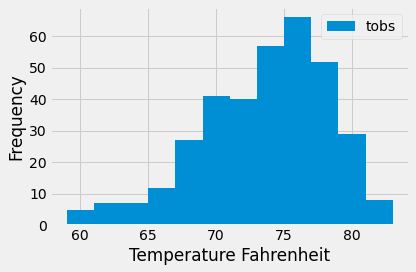

In [17]:
# plt.hist(tempstrings, bins=12)  # density=False would make counts
# plt.ylabel('Count')
# plt.xlabel('Temperature')
temp_df.plot.hist(by='tobs', bins=12)
plt.xlabel("Temperature Fahrenheit")
plt.tight_layout()
plt.show()

# Close session

In [18]:
# Close Session
session.close()